#Accident Analysis and Safety Improvements in Railways


***Analyze historic railway accident data to identify the key causes of accidents and propose safety measures***. This analysis might include:<br>
1. What are the most common causes of railway accidents?
2. Are there any geographical or time related patterns in accidents? (subject to data availability)
3. Which safety interventions could prevent future accidents?

**Railway Safety Investigations and Recommendations.**

1: **Investigations**
Contains details of railway accident investigations.
- Report Type (e.g., Final Report)

- Investigation Status (e.g., Closed)

- Occurrence ID (e.g., FI-135)

- Title (e.g., "Train derailment, Station Apeldoorn")

- Reporting Body (e.g., "Dutch Safety Board")

- Date & Time of Occurrence

- Occurrence Type (e.g., Train derailment, Signaling failure)

- Additional details related to investigation reports.

2:  **Safety Recommendations**
Contains recommendations for improving railway safety.
- Recommendation ID

- Recommendation Title

- Issue Date

- Detailed Recommendation Text

- Language

- Occurrence ID

- Title of Related Accident

- Reporting Body (e.g., "Accident Investigation Board Norway")



###**Objectives of EDA**
- Understand Data Structure
- Identify Missing Values & Outlier
- Summarize Key Statistics:
- Detect Patterns & Relationships
- Visualize Data
- Feature Engineering & Transformation

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
import os

In [ ]:
# Load dataset
file_path = "erail database.xlsx"
df = pd.read_excel(file_path, sheet_name="Investigations")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3859 entries, 0 to 3858
Data columns (total 65 columns):
 #   Column                                                                                                    Non-Null Count  Dtype         
---  ------                                                                                                    --------------  -----         
 0   Only received by email after ERAIL stopped to work                                                        716 non-null    object        
 1   Report Type                                                                                               3859 non-null   object        
 2   Investigation Status                                                                                      3859 non-null   object        
 3   ERAIL Occurrence                                                                                          3859 non-null   object        
 4   ID                                  

In [ ]:
df.head()

,Only received by email after ERAIL stopped to work,Report Type,Investigation Status,ERAIL Occurrence,ID,Title,Reporting Body,Date of occurrence,Time of occurrence,Occurrence type,...,Investigation report,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64
0,NaN,Final report,Closed,FI-135,NaN,"Wrong-side signalling failure, 29/06/2002, Kou...",Accident Investigation Board of Finland,2002-06-29,1900-01-01 08:33:00,Wrong-side signalling failure,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Final report,Closed,NL-444,NaN,"Train derailment, 30/04/2003, Station Apeldoor...",The Dutch Safety Board,2003-04-30,1900-01-01 00:42:00,Train derailment,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Final report,Closed,FI-134,NaN,"Other, 15.4.2004, Kaukomarkkinat Oy's track at...",Accident Investigation Board of Finland,2004-04-15,1900-01-01 17:31:00,Other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Final report,Closed,FI-45,NaN,"Train derailment, 5/11/2004, Pieksämäki Railwa...",Accident Investigation Board of Finland,2004-05-11,1900-01-01 12:57:00,Train derailment,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Final report,Closed,NL-168,NaN,"Spad, 21/05/2004, Station Amsterdam (The Nethe...",The Dutch Safety Board,2004-05-21,1900-01-01 18:35:00,Spad,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Features Overview



The dataset includes information about railway safety investigations, with key features such as:

**Basic Details**:

- Report Type (Final report, Interim report, etc.)

- Investigation Status (Closed, Ongoing)

- Title (Short summary of the incident)

- Reporting Body (Authority responsible for investigation)

- Date of occurrence and Time of occurrence

**Incident Description**:

- Occurrence type (Derailment, Collision, etc.)

- Occurrence description

- Location name, Country, Railway System type, Line type, Location type

**Casualties & Damage**:

- Passenger fatalities, Staff fatalities, Total fatalities

- Passenger serious injuries, Total serious injuries

- Estimated total material costs

- Damage Description

**Causes & Decisions**:

- Direct cause description

- Underlying and root causes description

- Decision to investigate

**Administrative Details**

- Notification date, Investigation closure date, Safety recommendations count

# Target Variable (Labels)


The dataset appears to focus on accident investigations. Potential target variables could be:

- Occurrence type (To classify the type of railway incident)

- Total fatalities (To predict severity)

- Decision to investigate (To analyze investigation necessity)

#Dataset Overview (Investigations Sheet)
- Total Records: 3,859

- Total Features (Columns): 65

- Datetime: 2 columns

- Float: 8 columns

- Object (Text/String): 55 columns

In [ ]:
df.columns

Index(['Only received by email after ERAIL stopped to work', 'Report Type',
       'Investigation Status', 'ERAIL Occurrence', 'ID', 'Title',
       'Reporting Body', 'Date of occurrence', 'Time of occurrence',
       'Occurrence type', 'Occurrence description', 'Country', 'Location name',
       'Railway System type', 'Line type', 'Location type', 'Movement type',
       'RU involved', 'IM involved', 'Passenger fatalities',
       'Staff fatalities', 'LC User fatalities',
       'Unauthorised person fatalities', 'Other fatalities',
       'Total fatalities', 'Passenger serious injuries',
       'Staff serious injuries', 'LC User serious injuries',
       'Unauth. person serious injuries', 'Other serious injuries',
       'Total serious injuries', 'Estimated total material costs',
       'Damage Description', 'Legal basis', 'Decision to investigate ',
       'N. of related Safety Recs',
       'Direct cause description (including causal and contributing factors, excluding those of syst

In [ ]:
# Selecting columns to drop from the dataset
columns_to_drop = [
    'Only received by email after ERAIL stopped to work', 'ERAIL Occurrence', 'ID', 'Acronym',
    'Report Type', 'Investigation Status', 'Reporting Body', 'Legal basis', 'Decision to investigate',
    'Notification date (occurrence creation date for data from ERAIL)',
    'Date of sending the interim statement(s), if any', 'Date of sending the final report to ERA',
    'Date of the investigation closure', 'Investigation report',
    'DATE (Italic format)', 'Day', 'Month', 'Year', 'Occurrence creation date',
    'Declaration date', 'Month DECL DATE', 'Year DECL DATE', 'Date of IM/RU notification',
    'Unnamed: 56', 'Unnamed: 57', 'Unnamed: 58', 'Unnamed: 59', 'Unnamed: 60', 'Unnamed: 61',
    'Unnamed: 62', 'Unnamed: 63', 'Unnamed: 64',
    'Direct cause description (including causal and contributing factors, excluding those of systemic nature)',
    'Underlying and root causes description (i.e. systemic factors, if any)', 'Damage Description',
    'Notes', "Title", "RU involved", "IM involved", "N. of related Safety Recs", "Delay", "Decision to investigate"
]
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)

In [ ]:
#basic information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3859 entries, 0 to 3858
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Date of occurrence               3859 non-null   datetime64[ns]
 1   Time of occurrence               3855 non-null   object        
 2   Occurrence type                  3859 non-null   object        
 3   Occurrence description           3857 non-null   object        
 4   Country                          3859 non-null   object        
 5   Location name                    3859 non-null   object        
 6   Railway System type              3851 non-null   object        
 7   Line type                        3849 non-null   object        
 8   Location type                    3859 non-null   object        
 9   Movement type                    3846 non-null   object        
 10  Passenger fatalities             3794 non-null   object     

In [ ]:
# This command helps identify all distinct occurrence types in the dataset, which is useful for data exploration and preprocessing
df["Occurrence type"].unique()

array(['Wrong-side signalling failure', 'Train derailment', 'Other',
       'Spad', 'Level crossing accident', 'Fire in RS',
       'Trains collision with an obstacle', 'Trains collision',
       'Accident to persons caused by RS in motion', 'Broken rails',
       'Runaway', 'Broken wheels or axles',
       'Unauthorised train movement other than SPAD',
       'Trains collision near miss', 'Level crossing near miss',
       'Track buckles', 'Dangerous goods release', 'Other event',
       'Rolling stock events', 'Operational event',
       'Railway vehicle movement events', 'Broken axles', 'Broken wheels',
       'Level crossing event', 'Infrastructure events', 'Electric shock',
       'Broken rails and track buckles', 'SPAD',
       'Railway vehicle movement event', 'Collission with object',
       'Wrong-side signaling failure', 'Rolling stock event',
       'Trains collision ', 'Train collision with technical device',
       'Infrastructure event',
       'Accident to person involvi

In [ ]:
#Accident Severity Mapping 1-4

severity_mapping = {
    "Wrong-side signalling failure": 2,
    "Train derailment": 3,
    "Other": 2,
    "Spad": 2,
    "Level crossing accident": 3,
    "Fire in RS": 3,
    "Trains collision with an obstacle": 2,
    "Trains collision": 4,
    "Accident to persons caused by RS in motion": 3,
    "Broken rails": 2,
    "Runaway": 3,
    "Broken wheels or axles": 2,
    "Unauthorised train movement other than SPAD": 2,
    "Trains collision near miss": 1,
    "Level crossing near miss": 1,
    "Track buckles": 2,
    "Dangerous goods release": 4,
    "Other event": 2,
    "Rolling stock events": 2,
    "Operational event": 1,
    "Railway vehicle movement events": 2,
    "Broken axles": 2,
    "Broken wheels": 2,
    "Level crossing event": 3,
    "Infrastructure events": 2,
    "Electric shock": 3,
    "Broken rails and track buckles": 2,
    "SPAD": 2,
    "Railway vehicle movement event": 2,
    "Collission with object": 2,
    "Wrong-side signaling failure": 2,
    "Rolling stock event": 2,
    "Trains collision ": 4,
    "Train collision with technical device": 3,
    "Infrastructure event": 2,
    "Accident to person involving rolling stock in motion": 3,
    "Train collision with an obstacle": 3,
    "Unauthorized train movement other than SPAD": 2,
    "Unauthorized movement (SPAD)": 2
}

df["Severity Level"] = df["Occurrence type"].map(severity_mapping)

In [ ]:
# Weather Conditions (Season-Based)

def assign_weather(date):
    if pd.isnull(date):  # Handle missing dates
        return "Unknown"
    month = date.month
    if month in [12, 1, 2]:  # Winter → Foggy
        return "Foggy"
    elif month in [9, 10, 11]:  # Monsoon → Rainy
        return "Rainy"
    elif month in [3, 4, 5, 6, 7, 8, 9]:  # Summer & Spring → Clear
        return "Clear"
    else:  # Other months → Mostly Clear with occasional Storms
        return np.random.choice(["Clear", "Stormy"], p=[0.8, 0.2])

df["Weather Conditions"] = df["Date of occurrence"].apply(assign_weather)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3859 entries, 0 to 3858
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Date of occurrence               3859 non-null   datetime64[ns]
 1   Time of occurrence               3855 non-null   object        
 2   Occurrence type                  3859 non-null   object        
 3   Occurrence description           3857 non-null   object        
 4   Country                          3859 non-null   object        
 5   Location name                    3859 non-null   object        
 6   Railway System type              3851 non-null   object        
 7   Line type                        3849 non-null   object        
 8   Location type                    3859 non-null   object        
 9   Movement type                    3846 non-null   object        
 10  Passenger fatalities             3794 non-null   object     

In [ ]:
num_columns = [
    "Passenger fatalities", "Staff fatalities", "LC User fatalities",
    "Unauthorised person fatalities", "Other fatalities", "Total fatalities",
    "Passenger serious injuries", "Staff serious injuries",
    "LC User serious injuries", "Unauth. person serious injuries",
    "Other serious injuries", "Total serious injuries"
]

df[num_columns] = df[num_columns].apply(pd.to_numeric, errors="coerce")

# Fill missing values in numerical columns with 0 (assuming missing means no fatalities/injuries)
df[num_columns] = df[num_columns].fillna(0).astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3859 entries, 0 to 3858
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Date of occurrence               3859 non-null   datetime64[ns]
 1   Time of occurrence               3855 non-null   object        
 2   Occurrence type                  3859 non-null   object        
 3   Occurrence description           3857 non-null   object        
 4   Country                          3859 non-null   object        
 5   Location name                    3859 non-null   object        
 6   Railway System type              3851 non-null   object        
 7   Line type                        3849 non-null   object        
 8   Location type                    3859 non-null   object        
 9   Movement type                    3846 non-null   object        
 10  Passenger fatalities             3859 non-null   int64      

In [ ]:
# calculates the number of missing (NaN) values in each column of the DataFrame
df.isnull().sum()

,0
Date of occurrence,0
Time of occurrence,4
Occurrence type,0
Occurrence description,2
Country,0
Location name,0
Railway System type,8
Line type,10
Location type,0
Movement type,13


In [ ]:
# Ensure column names have no extra spaces
df.columns = df.columns.str.strip()

# Fill missing values properly and accurate
df.loc[:, "Time of occurrence"] = df["Time of occurrence"].fillna("Unknown")
df.loc[:, "Occurrence description"] = df["Occurrence description"].fillna("Not provided")
df.loc[:, "Railway System type"] = df["Railway System type"].fillna("Unknown")
df.loc[:, "Line type"] = df["Line type"].fillna("Unknown")
df.loc[:, "Movement type"] = df["Movement type"].fillna("Unknown")
df.loc[:, "Decision to investigate"] = df["Decision to investigate"].fillna("Unknown")

# Handle numerical missing values correctly
if df["Estimated total material costs"].dtype == "object":
    df.loc[:, "Estimated total material costs"] = df["Estimated total material costs"].fillna("Unknown")
else:
    df.loc[:, "Estimated total material costs"] = df["Estimated total material costs"].fillna(df["Estimated total material costs"].median())


In [ ]:
df.isnull().sum()

,0
Date of occurrence,0
Time of occurrence,0
Occurrence type,0
Occurrence description,0
Country,0
Location name,0
Railway System type,0
Line type,0
Location type,0
Movement type,0


In [ ]:
# Extract Year, Month, and Day
df["Year"] = df["Date of occurrence"].dt.year
df["Month"] = df["Date of occurrence"].dt.month
df["Day"] = df["Date of occurrence"].dt.day
df["Day_of_Week"] = df["Date of occurrence"].dt.day_name()

# Convert 'Time of occurrence' to extract Hour (handle 'Unknown' separately)
df["Time of occurrence"] = pd.to_datetime(df["Time of occurrence"], errors="coerce")
df["Hour"] = df["Time of occurrence"].dt.hour

In [ ]:
def categorize_severity(level):
    if level <= 2:
        return "Low"
    elif 3 <= level <= 5:
        return "Medium"
    else:
        return "High"

df["Severity Category"] = df["Severity Level"].apply(categorize_severity)

In [ ]:
weather_mapping = {
    "Clear": "Good",
    "Sunny": "Good",
    "Cloudy": "Moderate",
    "Rain": "Bad",
    "Storm": "Severe",
    "Snow": "Severe",
    "Fog": "Severe"
}

df["Weather Category"] = df["Weather Conditions"].map(weather_mapping).fillna("Unknown")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3859 entries, 0 to 3858
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Date of occurrence               3859 non-null   datetime64[ns]
 1   Time of occurrence               3611 non-null   datetime64[ns]
 2   Occurrence type                  3859 non-null   object        
 3   Occurrence description           3859 non-null   object        
 4   Country                          3859 non-null   object        
 5   Location name                    3859 non-null   object        
 6   Railway System type              3859 non-null   object        
 7   Line type                        3859 non-null   object        
 8   Location type                    3859 non-null   object        
 9   Movement type                    3859 non-null   object        
 10  Passenger fatalities             3859 non-null   int64      

In [ ]:
# Remove rows where 'Occurrence type' is 'Unknown'
df = df[df["Occurrence type"] != "Unknown"].reset_index(drop=True)

In [ ]:
# Ensure the column is treated as string before replacing characters
df["Estimated total material costs"] = (
    df["Estimated total material costs"]
    .astype(str)  # Convert to string first
    .str.replace(r"[^\d.]", "", regex=True)  # Remove non-numeric characters
    .replace("", np.nan)  # Replace empty strings with NaN
    .astype(float)  # Convert to numeric
)

In [ ]:
# Load the correct sheet
df2 = pd.read_excel("cleaned_railway_data1.xlsx", sheet_name="Sheet2")

# Combine columns for analysis
df2["combined_text"] = (
    df2["Occurrence type"].fillna("").astype(str).str.lower() + " " +
    df2["Underlying and root causes description (i.e. systemic factors, if any)"].fillna("").astype(str).str.lower() + " " +
    df2["Direct cause description (including causal and contributing factors, excluding those of systemic nature)"].fillna("").astype(str).str.lower()
)

# Updated Direct Cause classifier
def direct_cause(text):
    text = str(text).lower()
    text = text.replace("_x000d_", " ")


    # Level crossing
    if "level crossing accident" in text or any(w in text for w in ["level crossing", "crossing", "light", "acoustic", "warning", "stop"]):
        return "Level Crossing Accident"

    # Person on track
    elif "accident to persons caused by rs in motion" in text or "hit by train" in text or "person on track" in text:
        return "Hit by Train / Person on Track"

    # Signal Passed at Danger
    elif "spad" in text or "signal passed at danger" in text:
        return "Signal Passed at Danger (SPAD)"

    # Signal-related (excluding SPAD)
    elif any(w in text for w in ["signal failure", "interlocking", "relay issue", "signal not visible", "wrong signal"]):
        return "Signal/Interlocking Failure"
    elif any(w in text for w in ["signal cable", "cable cut", "communication cable", "wire stolen"]):
        return "Signal - Cable Cut"

    # Track-related derailments
    elif any(w in text for w in ["rail fracture", "track break", "broken rail", "cracked rail", "track crack"]):
        return "Derailment - Broken Rail"
    elif any(w in text for w in ["buckling", "track alignment", "geometry fault", "twist", "kink"]):
        return "Track Alignment Issue"
    elif any(w in text for w in ["weld failure", "joint failure", "poor welding", "raised weld"]):
        return "Track Joint/Welding Issue"
    elif any(w in text for w in ["turnout", "trap siding", "point failure", "diverted to wrong line", "switch", "position"]):
        return "Derailment - Turnout Fault"

    # Rolling stock / train equipment issues
    elif any(w in text for w in ["brake", "brk fail", "handbrake", "brake not working"]):
        return "Brake Failure"
    elif any(w in text for w in ["axle defect", "spring failure", "bearing failure", "flat wheel", "false flange", "hot axle"]):
        return "Derailment - Wheel Defect"
    elif any(w in text for w in ["equipment failure", "mechanical defect", "coupler failure", "gearbox", "traction motor", "bogie defect"]):
        return "Mechanical Equipment Failure"

    # Fire and overheating
    elif any(w in text for w in ["short circuit", "spark", "electrical fire", "smoke from equipment", "fire due to wiring"]):
        return "Fire - Electrical Short Circuit"
    elif any(w in text for w in ["engine fire", "diesel leakage", "fuel fire"]):
        return "Fire - Diesel Engine Fire"
    elif any(w in text for w in ["hot axle", "brake overheat", "brake binding", "heat buildup"]):
        return "Fire - Brake Overheat"

    # Collision and obstruction
    elif any(w in text for w in ["collision", "hit by", "rammed", "rear-end", "head-on", "crashed", "shunting"]):
        return "Collision"
    elif any(w in text for w in ["obstruction", "animal", "boulder", "tree", "vehicle on track", "blocked track", "fallen object"]):
        return "Derailment - Obstruction on Track"

    # Speed and fatigue
    elif any(w in text for w in ["overspeed", "speeding", "high speed", "excessive speed"]):
        return "Derailment - Overspeeding"
    elif any(w in text for w in ["fatigue", "tired", "sleep", "drowsy", "dozed", "driver asleep"]):
        return "Human Fatigue"

    # External Interference
    elif any(w in text for w in ["mob", "stone", "vandalism", "external", "protest", "unauthorized entry", "sabotage"]):
        return "External Interference"

    # Catch-all for unknown derailment causes (but still try inference)
    elif "derailment" in text:
        if any(w in text for w in ["overspeed", "speeding"]):
            return "Derailment - Overspeeding"
        elif any(w in text for w in ["broken rail", "fracture", "track crack"]):
            return "Derailment - Broken Rail"
        elif any(w in text for w in ["turnout", "point", "trap siding"]):
            return "Derailment - Turnout Fault"
        elif any(w in text for w in ["wheel", "flange", "flat", "axle"]):
            return "Derailment - Wheel Defect"
        elif any(w in text for w in ["obstruction", "animal", "boulder", "tree"]):
            return "Derailment - Obstruction on Track"
        elif any(w in text for w in ["brake", "coupler", "bogie"]):
            return "Derailment - Mechanical Failure"
        else:
            return "Unknown Derailment Cause"

    # If nothing matches, classify as 'Other'
    return "Other"




# Updated Category classifier
def category_cause(direct_cause):
    cause = str(direct_cause).lower()

    if cause in [
        "signal passed at danger (spad)",
        "human fatigue"
    ]:
        return "Human Error - Operational"

    elif cause in [
        "mechanical equipment failure",
        "brake failure",
        "derailment - wheel defect",
        "derailment - mechanical failure"
    ]:
        return "Mechanical Failure"

    elif cause in [
        "signal/interlocking failure",
        "signal - cable cut"
    ]:
        return "Signal/Communication Fault"

    elif cause in [
        "derailment - broken rail",
        "track alignment issue",
        "track joint/welding issue",
        "derailment - turnout fault"
    ]:
        return "Infrastructure Fault"

    elif cause in [
        "collision",
        "derailment - obstruction on track",
        "derailment - overspeeding",
        "level crossing accident",
        "hit by train / person on track",
        "unknown derailment cause"
    ]:
        return "Operational Hazard/Event"

    elif cause in [
        "fire - electrical short circuit",
        "fire - diesel engine fire",
        "fire - brake overheat"
    ]:
        return "Fire/Disaster Related"

    elif cause == "external interference":
        return "External Interference"

    elif cause == "other":
        return "Other"

    else:
        return "Other"

# Apply classification
df["Direct Cause"] = df2["combined_text"].apply(direct_cause)
df["Category of Cause"] = df["Direct Cause"].apply(category_cause)

# Drop helper column
# df2.drop(columns=["combined_text"], inplace=True)


In [ ]:
# View first few rows
df[["Direct Cause", "Category of Cause"]].head()

,Direct Cause,Category of Cause
0,Other,Other
1,Unknown Derailment Cause,Operational Hazard/Event
2,Derailment - Wheel Defect,Mechanical Failure
3,Human Fatigue,Human Error - Operational
4,Signal Passed at Danger (SPAD),Human Error - Operational


In [ ]:
df["Direct Cause"].value_counts()

,count
Direct Cause,
Level Crossing Accident,1356
Derailment - Turnout Fault,433
Unknown Derailment Cause,423
Collision,349
Hit by Train / Person on Track,298
Other,281
Signal Passed at Danger (SPAD),176
Human Fatigue,120
Derailment - Wheel Defect,102


In [ ]:
df["Category of Cause"].value_counts()

,count
Category of Cause,
Operational Hazard/Event,2448
Infrastructure Fault,548
Human Error - Operational,296
Other,281
Mechanical Failure,205
Signal/Communication Fault,36
External Interference,23
Fire/Disaster Related,22


In [ ]:
df.to_excel("final_cleaned_railway_data.xlsx", index=False)

# Exploratory Analysis & Visualization

(1) **Number of Railway Accidents Per Year**

<ipython-input-108-b49dd3d70c2e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df["Year"]>2005], x="Year", palette="viridis")


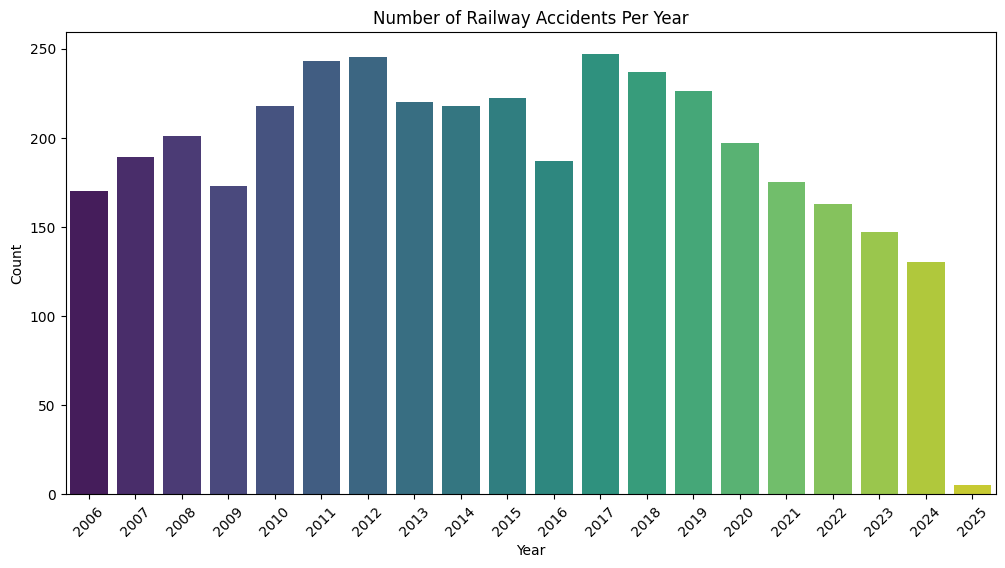

In [ ]:
#Number of Accidents per Year

plt.figure(figsize=(12, 6))
sns.countplot(data=df[df["Year"]>2005], x="Year", palette="viridis")
plt.xticks(rotation=45)
plt.title("Number of Railway Accidents Per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

**Observation**:
- **Railway accidents peaked around 2011-2017**, with the highest count observed in this period.  
- **A steady decline is seen after 2017**, indicating improved safety measures or reduced railway operations.  
- **The lowest accident counts are in the early 2000s and after 2020**, suggesting historical trends and recent improvements.  
- **The year 2025 shows minimal data**, likely due to incomplete reporting for the year.

<Axes: title={'center': 'Top 10 Direct Causes of Accidents'}, ylabel='Direct Cause'>

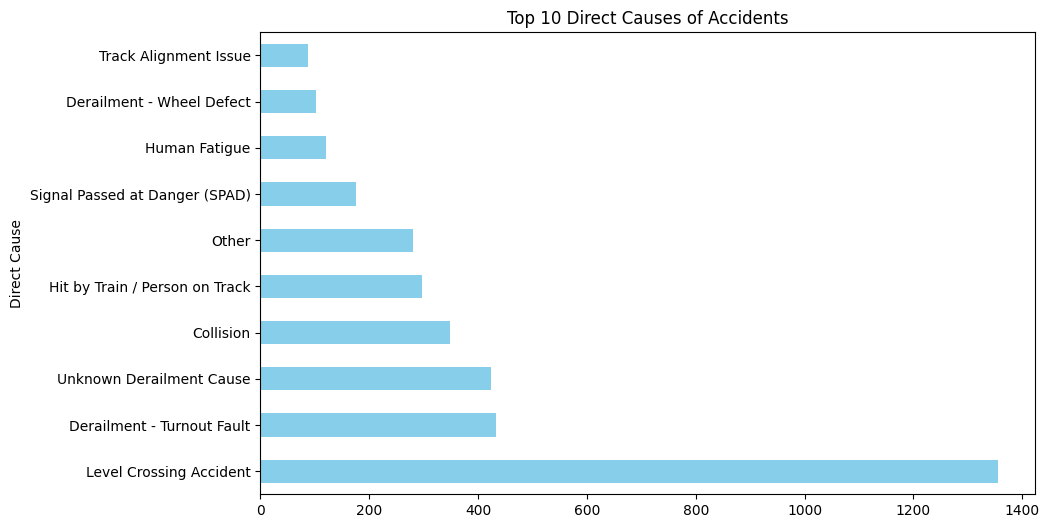

In [ ]:
#Top 10 Direct Causes
df["Direct Cause"].value_counts().head(10).plot(kind="barh", figsize=(10,6), color="skyblue", title="Top 10 Direct Causes of Accidents")

(3) **Accidents by Months,Weeks and Hours**



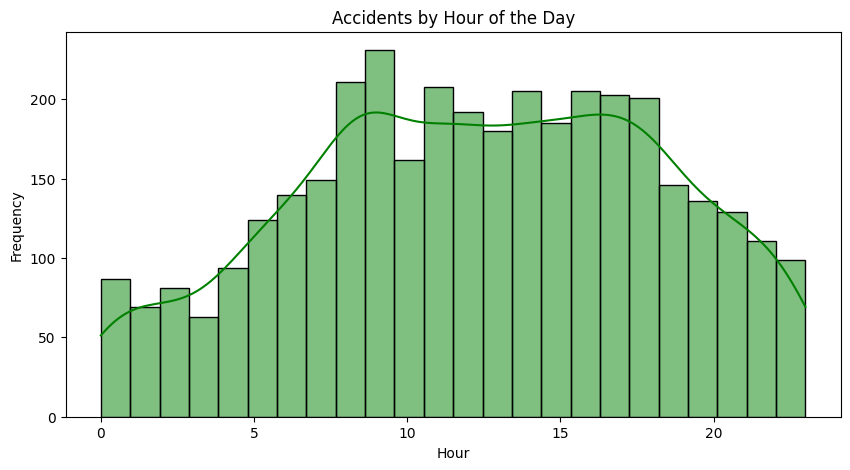

In [ ]:
# Accidents by Hour of the Day
plt.figure(figsize=(10,5))
sns.histplot(df["Hour"], bins=24, kde=True, color="green")
plt.title("Accidents by Hour of the Day")
plt.xlabel("Hour")
plt.ylabel("Frequency")
plt.show()

**Observations**:
- **Morning (8 AM - 11 AM)** and **evening (3 PM - 6 PM)** are high-risk periods, requiring enhanced safety measures during these hours.

- Mid-year months (especially **July**) and weekdays (**Tuesday - Thursday**) see more accidents, indicating the need for better safety enforcement during these times.

- Fewer accidents occur on weekends and in **December/April** , possibly due to reduced railway activity.



 (4) **Distribution of Accident Severity Levels**


<ipython-input-111-a63347a4ce3c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Severity Level", palette="coolwarm")


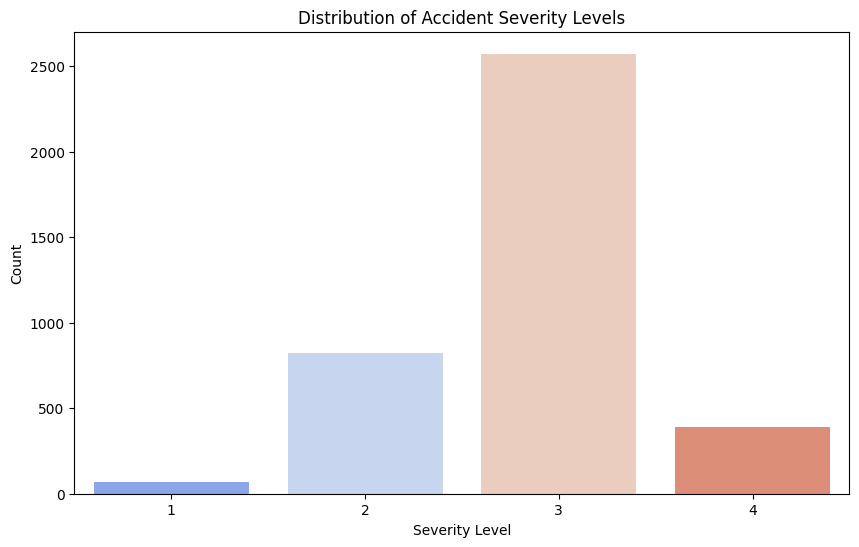

In [ ]:
# Severity Level Analysis

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Severity Level", palette="coolwarm")
plt.title("Distribution of Accident Severity Levels")
plt.xlabel("Severity Level")
plt.ylabel("Count")
plt.show()

**Onservation**:
- **Severity Level 3** has the highest occurrence, significantly outnumbering other levels.

- **Severity Level 2** is the second most common, but far behind Level 3.

- **Severity Levels 1 and 4** are much less frequent, with Level 1 being the rarest.

(5) **Impact of Weather Conditions on Railways Accidents**


<ipython-input-149-2c282a8c8960>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y="Weather Conditions", order=df["Weather Conditions"].value_counts().index, palette="inferno")


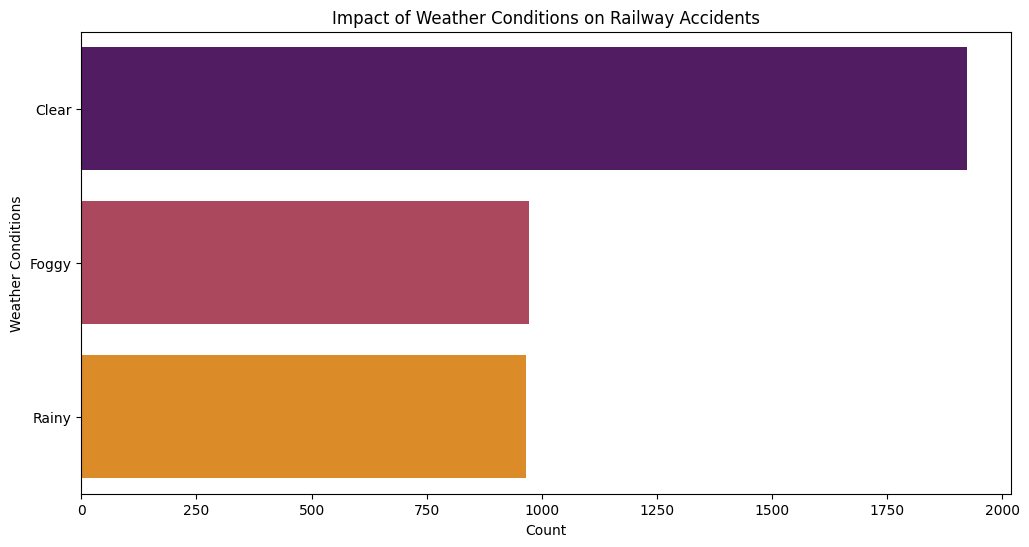

In [ ]:
# Weather Impact on Accidents

plt.figure(figsize=(12, 6))
sns.countplot(data=df, y="Weather Conditions", order=df["Weather Conditions"].value_counts().index, palette="inferno")
plt.title("Impact of Weather Conditions on Railway Accidents")
plt.xlabel("Count")
plt.ylabel("Weather Conditions")
plt.show()

**Observations**:
- Most railway accidents occur in clear weather, suggesting that environmental conditions are not always the primary cause.

- **Rainy conditions** contribute significantly to accidents, making it the second highest category.

- **Foggy conditions** also have a notable number of accidents, likely due to reduced visibility.

- **Stormy weather** has the least impact, possibly because train operations are reduced or safety measures are heightened in severe conditions.-

(6) **Correlation Matrix of Numerical Variables**

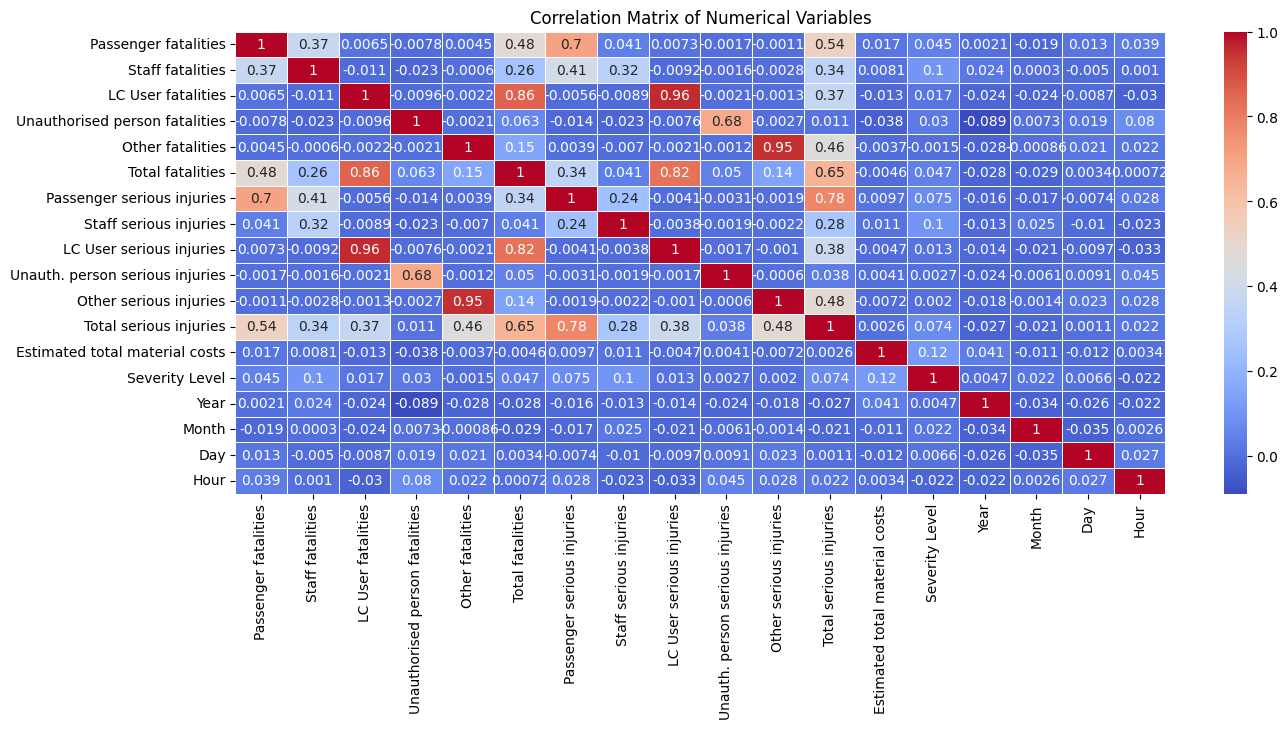

In [ ]:
# Correlation Heatmap (Only Numerical Features)
plt.figure(figsize=(15, 6))
numeric_df = df.select_dtypes(include=['number'])  # Select only numerical columns
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Numerical Variables")
plt.show()

**Observation**:
- **Passenger fatalities strongly correlate with passenger serious injuries (0.70)**, indicating that severe accidents affecting passengers tend to result in both fatalities and injuries.  
- **LC User fatalities and LC User serious injuries have a very high correlation (0.96)**, suggesting that level crossing accidents tend to result in both injuries and fatalities simultaneously.  
- **Total fatalities and total serious injuries show a strong correlation (0.65)**, implying that accidents with serious injuries are likely to also involve fatalities.  
- **Severity Level has a weak correlation with fatalities and injuries**, indicating that accident severity may not always directly translate into higher casualties.

In [ ]:
# Summary Statistics with Outliers Detection
df.describe()

,Date of occurrence,Time of occurrence,Passenger fatalities,Staff fatalities,LC User fatalities,Unauthorised person fatalities,Other fatalities,Total fatalities,Passenger serious injuries,Staff serious injuries,LC User serious injuries,Unauth. person serious injuries,Other serious injuries,Total serious injuries,Estimated total material costs,Severity Level,Year,Month,Day,Hour
count,3859,3611,3859.000000,3859.000000,3859.000000,3859.000000,3859.000000,3859.000000,3859.000000,3859.000000,3859.000000,3859.000000,3859.000000,3859.000000,2.787000e+03,3859.000000,3859.000000,3859.000000,3859.000000,3611.000000
mean,2015-02-04 20:45:57.605597184,1900-08-04 23:28:45.976183808,0.088106,0.067634,0.213009,0.039907,0.020990,0.431459,0.318476,0.072558,0.088106,0.005442,0.039388,0.527598,3.557186e+11,2.851516,2014.599896,6.484581,15.643690,12.332872
min,2002-06-29 00:00:00,1900-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,2002.000000,1.000000,1.000000,0.000000
25%,2010-11-04 12:00:00,1900-01-01 08:30:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000e+05,3.000000,2010.000000,3.000000,8.000000,8.000000
50%,2015-01-12 00:00:00,1900-01-01 13:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000e+05,3.000000,2015.000000,7.000000,16.000000,12.000000
75%,2019-05-06 12:00:00,1900-01-01 17:37:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000e+06,3.000000,2019.000000,9.000000,23.000000,17.000000
max,2025-01-22 00:00:00,2025-04-18 23:20:00,78.000000,11.000000,190.000000,12.000000,32.000000,191.000000,85.000000,14.000000,97.000000,10.000000,126.000000,126.000000,1.423096e+13,4.000000,2025.000000,12.000000,31.000000,23.000000
std,NaN,NaN,1.585971,0.379403,3.109748,0.284312,0.545327,3.628077,3.183745,0.400778,1.628705,0.175543,2.032270,4.201811,8.929551e+11,0.605384,5.225804,3.438711,8.815855,5.965967


(8) **Yearly Trend of Railway Accidents**

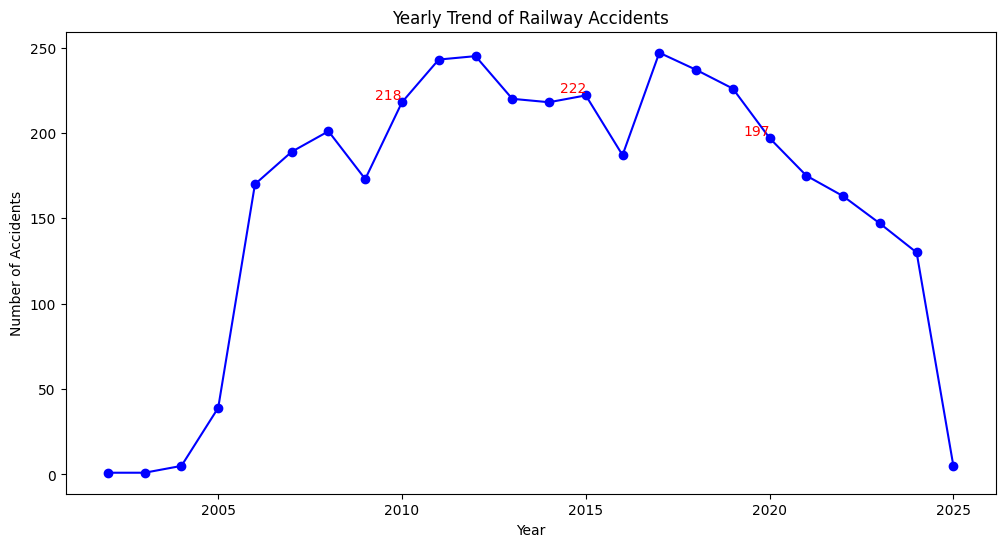

In [ ]:
# Yearly Trend of Railway Accidents with Annotations
plt.figure(figsize=(12, 6))
yearly_trend = df.groupby('Year').size()
yearly_trend.plot(kind='line', marker='o', color='b')
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.title("Yearly Trend of Railway Accidents")

# Annotate major changes
for year, count in yearly_trend.items():
    if year in [2010, 2015, 2020]:  # Example years for major safety reforms
        plt.text(year, count, str(count), ha='right', va='bottom', fontsize=10, color='red')

plt.show()

**Observations**:
- Peak accident rates occurred between 2010-2015.

- A steady decline in accidents has been observed since 2018.

- Further investigation is needed to determine contributing factors behind the sharp drop after 2020.

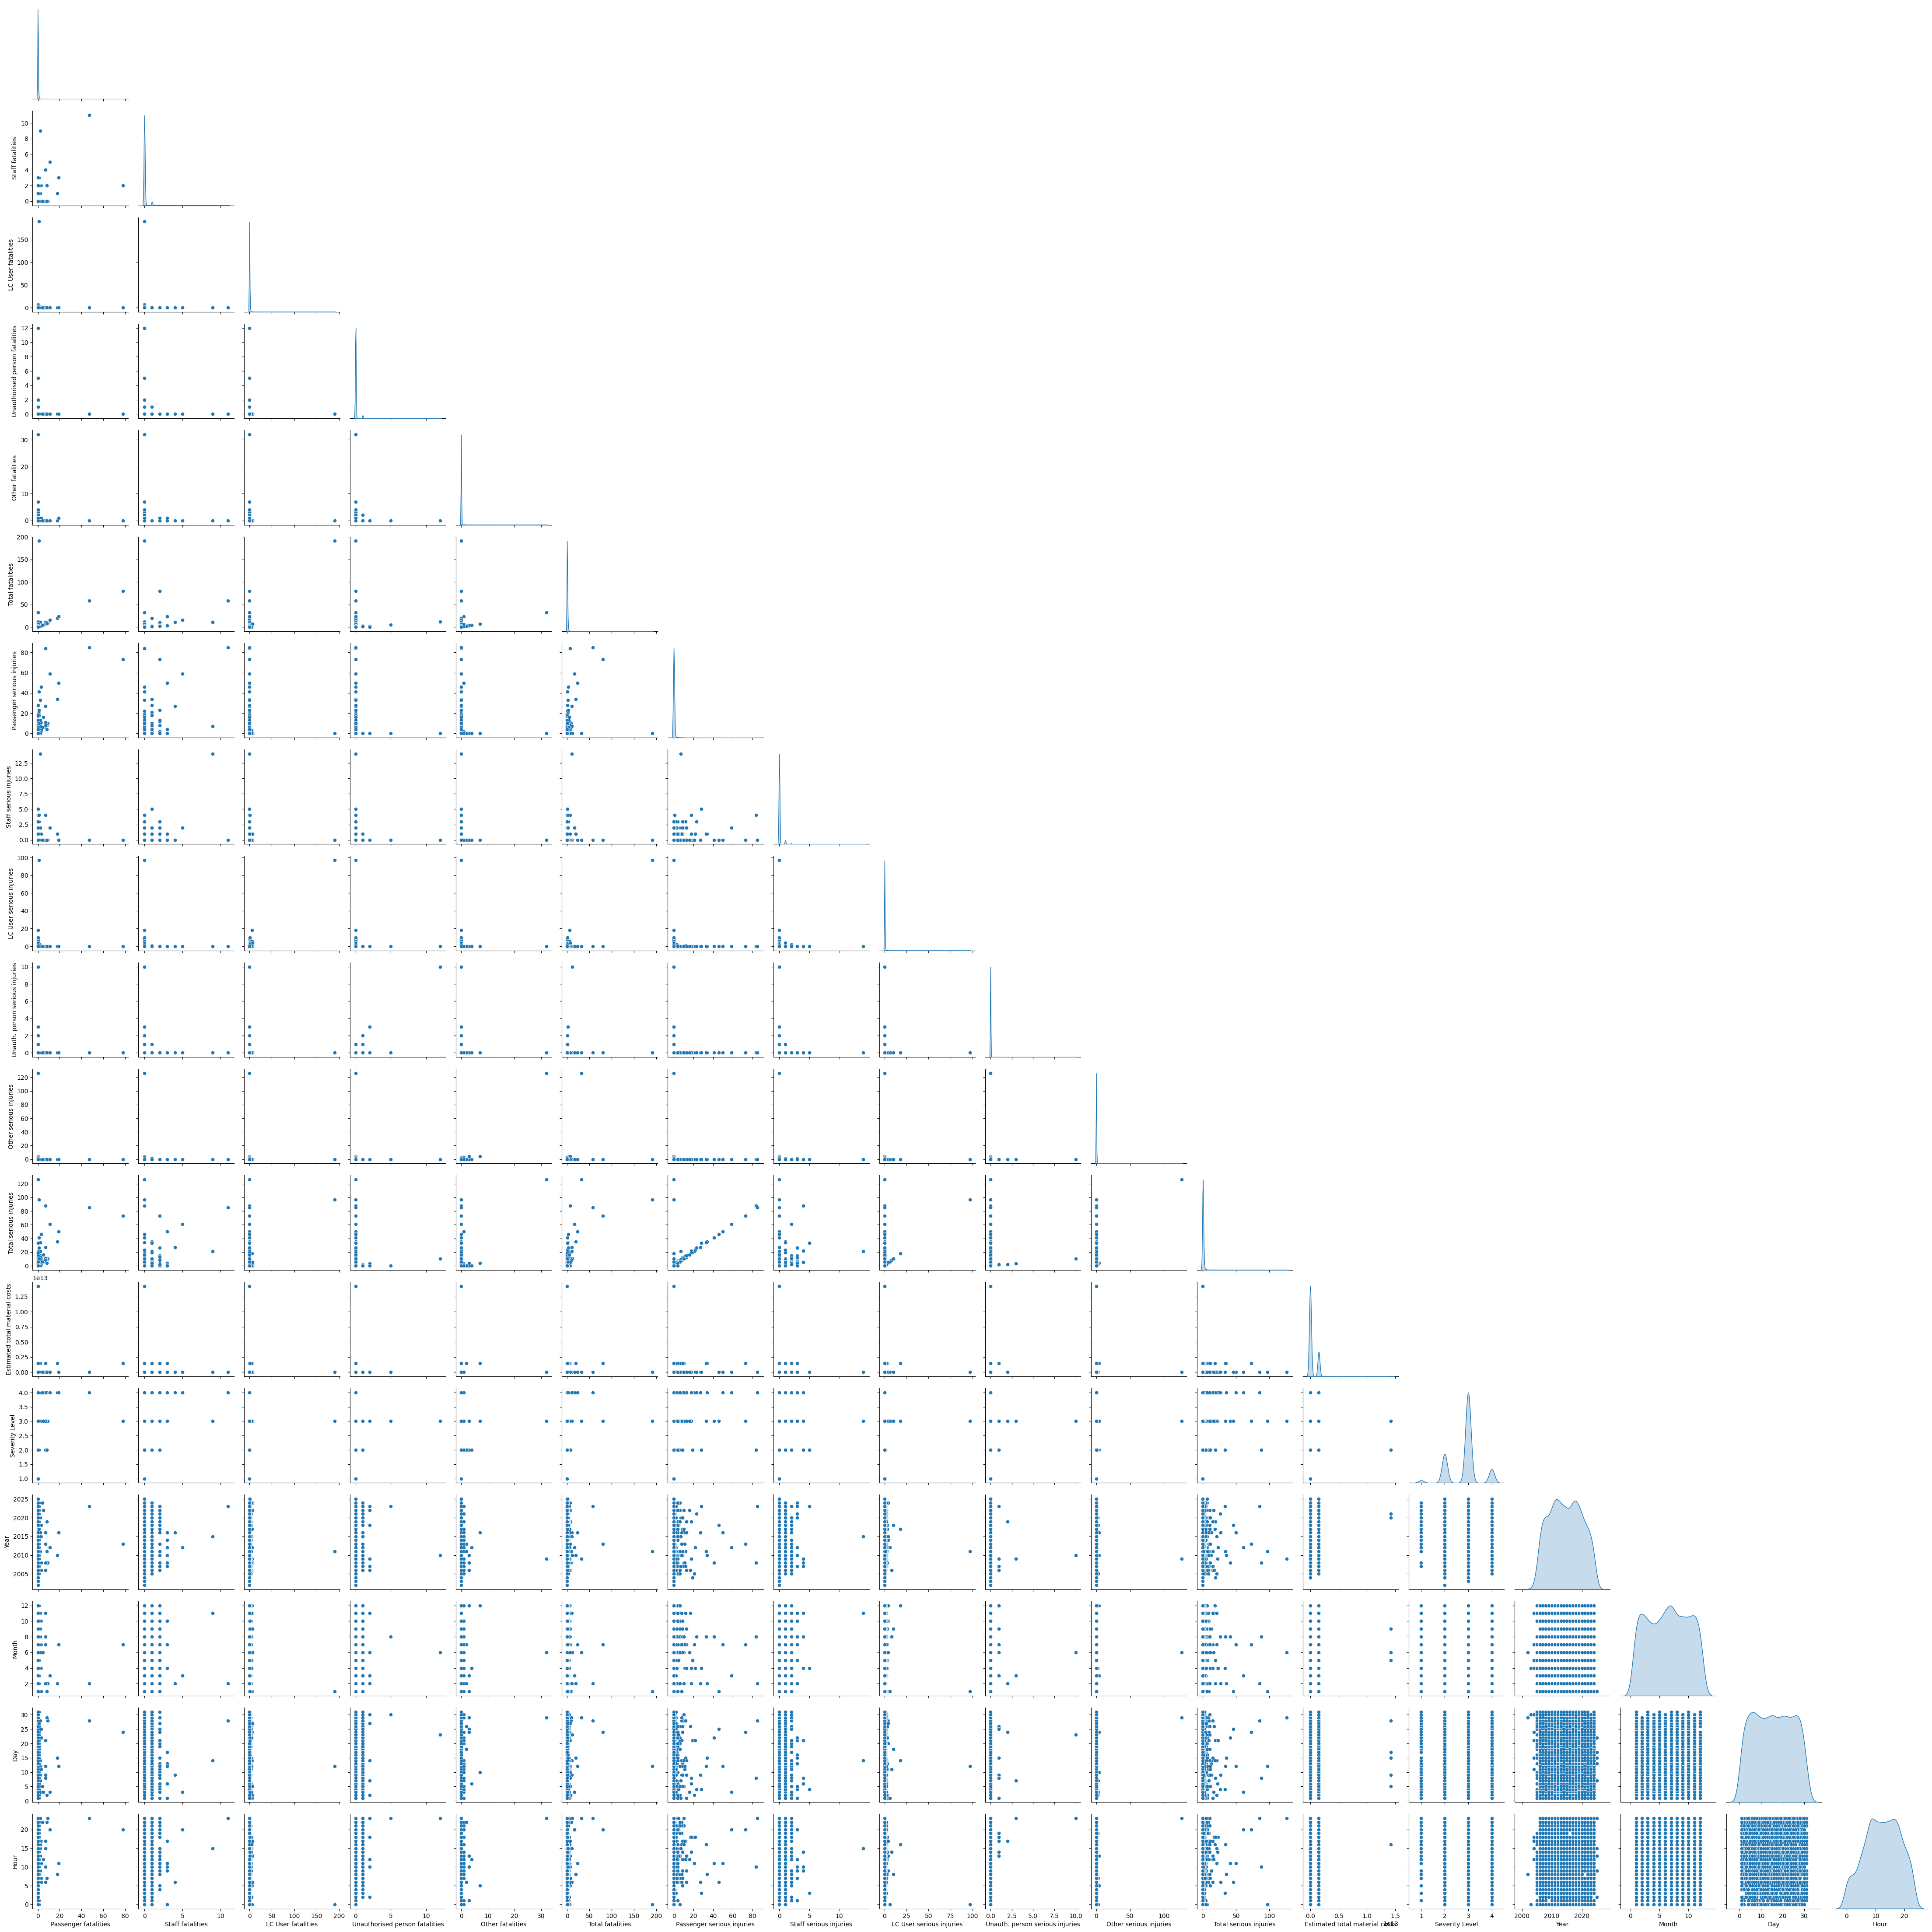

In [ ]:
# Pairplot to Explore Multivariable Trends
sns.pairplot(numeric_df, diag_kind='kde', corner=True)
plt.show()

<Figure size 1200x600 with 0 Axes>

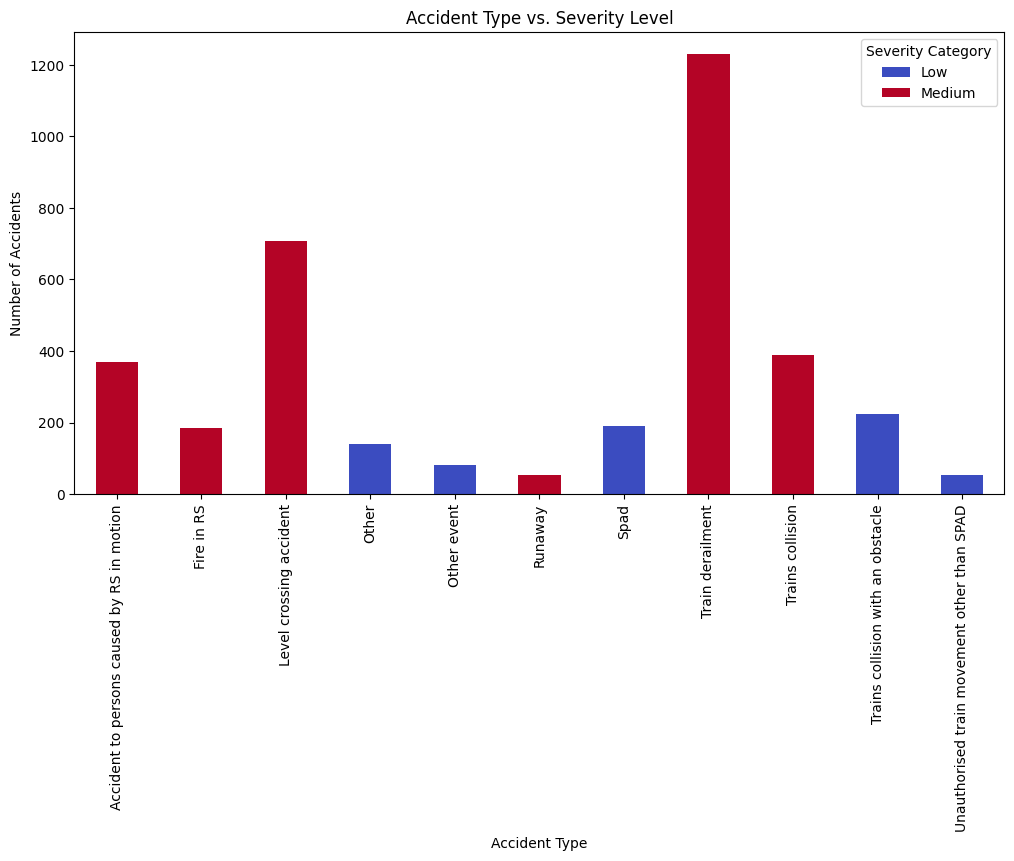

In [ ]:
#Stacked Bar Chart for Accident Type vs. Severity

plt.figure(figsize=(12, 6))
df_pivot = df.pivot_table(index='Occurrence type', columns='Severity Category', aggfunc='size', fill_value=0)
df_pivot = df_pivot[df_pivot.sum(axis=1) > 50]  # Filter for common accident types
df_pivot.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(12, 6))
plt.xlabel("Accident Type")
plt.ylabel("Number of Accidents")
plt.title("Accident Type vs. Severity Level")
plt.legend(title="Severity Category")
plt.xticks(rotation=90)
plt.show()

**Observation** :
- **Train derailment** has the highest number of accidents, categorized as medium severity.  
- **Level crossing accidents and train collisions** are also significant and mostly of medium severity.  
- **Accidents involving persons and fire in rolling stock** are moderately frequent and fall under medium severity.  
- **SPAD, trains colliding with obstacles, and "Other" categories** are mostly of low severity.  
- **Most high-frequency accidents are classified under medium severity**, while less frequent ones tend to be low severity.

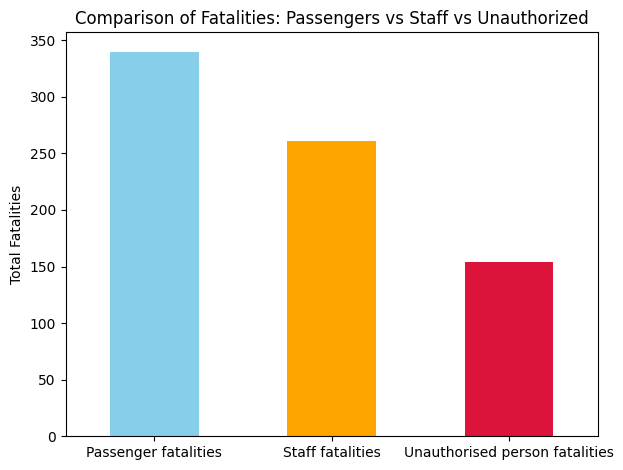

In [ ]:
#Comparison of Passenger, Staff, and Unauthorized Person Fatalities
fatality_cols = ["Passenger fatalities", "Staff fatalities", "Unauthorised person fatalities"]

df[fatality_cols].sum().plot(kind='bar', color=["skyblue", "orange", "crimson"])
plt.title("Comparison of Fatalities: Passengers vs Staff vs Unauthorized")
plt.ylabel("Total Fatalities")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

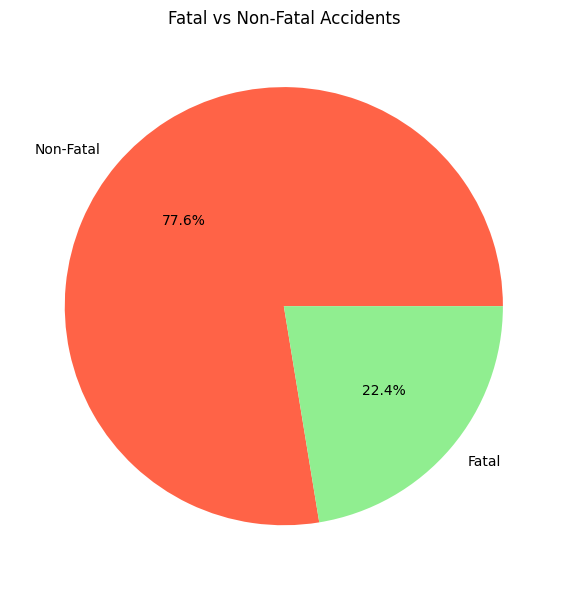

In [ ]:
#Proportion of Fatal vs Non-Fatal Accidents
df["Fatal"] = df["Total fatalities"].apply(lambda x: "Fatal" if x > 0 else "Non-Fatal")

plt.figure(figsize=(6, 6))
df["Fatal"].value_counts().plot.pie(autopct='%1.1f%%', colors=["tomato", "lightgreen"])
plt.title("Fatal vs Non-Fatal Accidents")
plt.ylabel("")
plt.tight_layout()
plt.show()

<ipython-input-120-842b55adfcc9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values, y=top_locations.index, palette="magma")


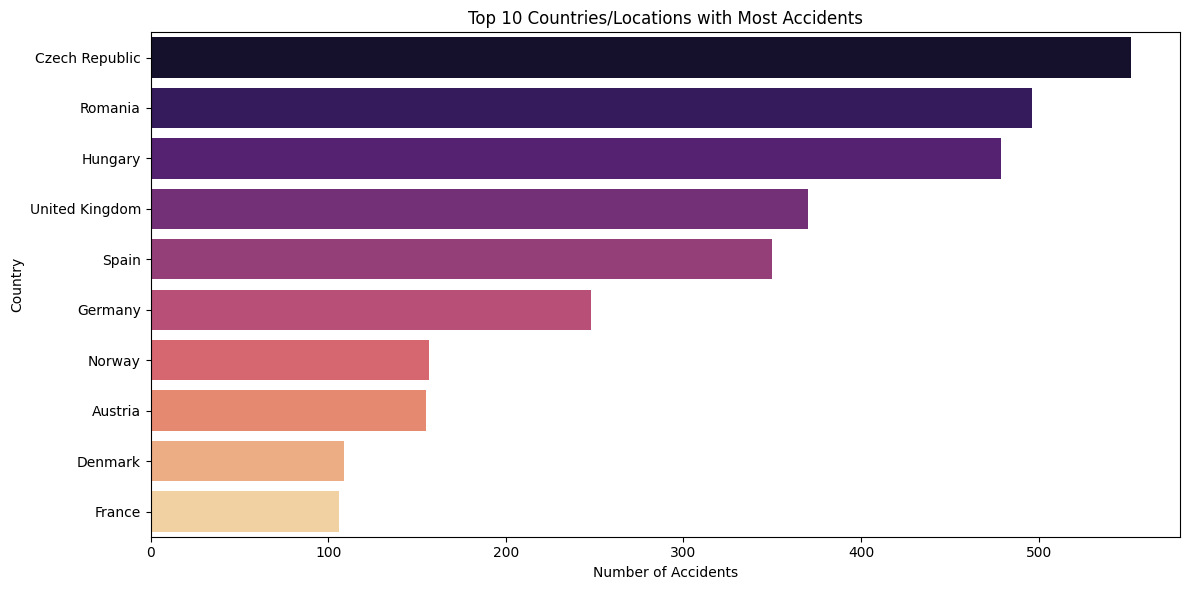

In [ ]:
#Locations with Highest Number of Accidents
top_locations = df["Country"].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_locations.values, y=top_locations.index, palette="magma")
plt.title("Top 10 Countries/Locations with Most Accidents")
plt.xlabel("Number of Accidents")
plt.tight_layout()
plt.show()

<ipython-input-121-e95af33e752a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_fatalities.values, y=location_fatalities.index, palette="cubehelix")


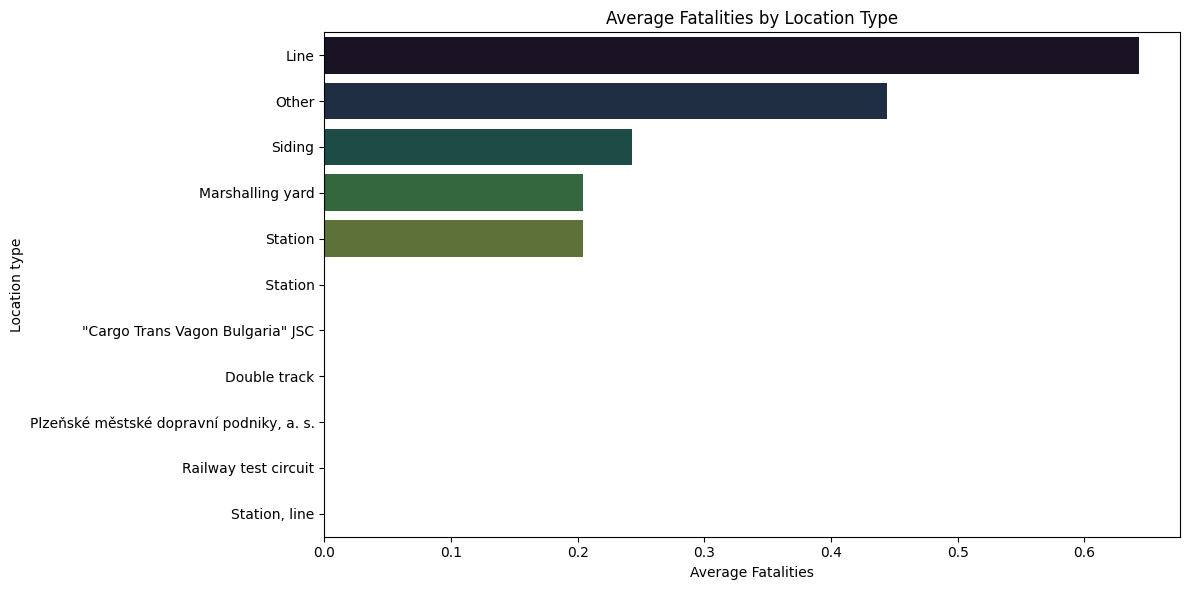

In [ ]:
#Influence of Location Type on Fatalities
location_fatalities = df.groupby("Location type")["Total fatalities"].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=location_fatalities.values, y=location_fatalities.index, palette="cubehelix")
plt.title("Average Fatalities by Location Type")
plt.xlabel("Average Fatalities")
plt.tight_layout()
plt.show()


<ipython-input-122-853e16d3b9c1>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=severity_by_system.values, y=severity_by_system.index, palette="coolwarm")


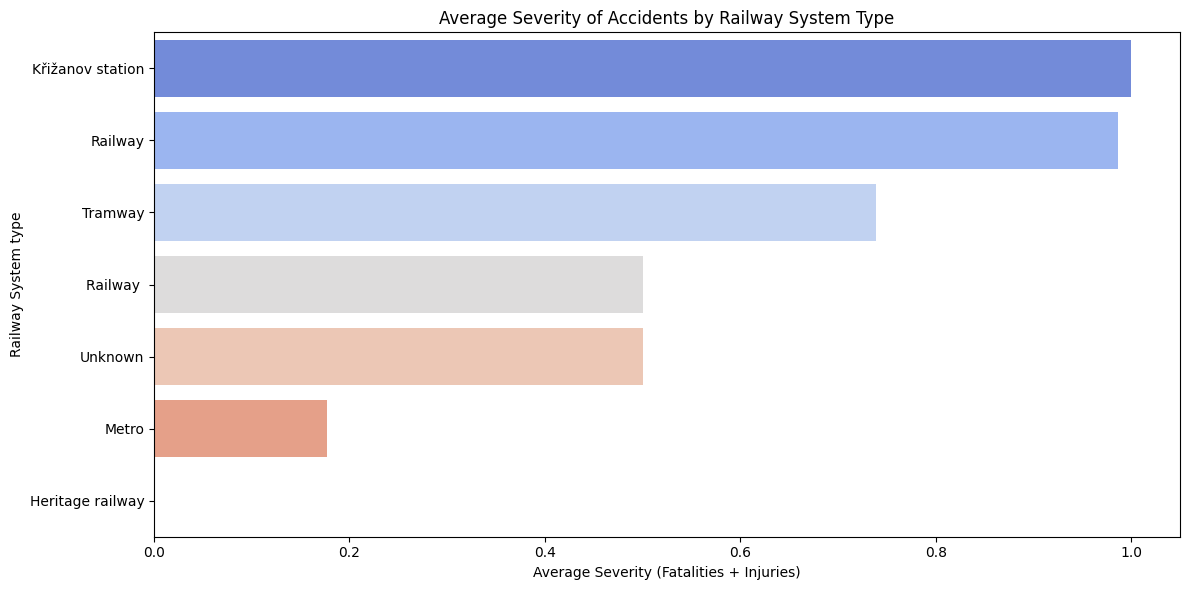

In [ ]:
#Severity of Accidents by Railway System Type

df["Severity"] = df["Total fatalities"] + df["Total serious injuries"]
severity_by_system = df.groupby("Railway System type")["Severity"].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=severity_by_system.values, y=severity_by_system.index, palette="coolwarm")
plt.title("Average Severity of Accidents by Railway System Type")
plt.xlabel("Average Severity (Fatalities + Injuries)")
plt.tight_layout()
plt.show()

In [ ]:
file_path = "master-data-year-and-broad-cause-wise-trend-of-consequential-train-accidents-on-indian-railways.xlsx"
df1 = pd.read_excel(file_path)

In [ ]:
df1.head()

,fiscal_year,state,Accident ID,Zone,Geometry of Track,Train Type,Train Speeed,Track condition,Weather,Time of day,cause,value,units
0,2021-22,All India,239869,CR,Straight,Passenger,96,Good,Clear,Morning,Combination of Factors,0,value in absolute number
1,2021-22,All India,239868,ECR,Curve,Goods,65,Damaged,Clear,Afternoon,Could not be Established/None Held Responsible,2,value in absolute number
2,2021-22,All India,239867,ECoR,Curve,Express,105,Undermaintenance,Rain,Night,Failure of Equipment,5,value in absolute number
3,2021-22,All India,239866,ER,Straight,Suburban,45,Undermaintenance,Rain,Night,Failure of other than Railway staff,4,value in absolute number
4,2021-22,All India,239865,NCR,Curve,Passenger,95,Undermaintenance,Rain,Night,Failure of Railway Staff,20,value in absolute number


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   fiscal_year        192 non-null    object
 1   state              192 non-null    object
 2   Accident ID        192 non-null    int64 
 3   Zone               192 non-null    object
 4   Geometry of Track  192 non-null    object
 5   Train Type         192 non-null    object
 6   Train Speeed       192 non-null    int64 
 7   Track condition    192 non-null    object
 8   Weather            192 non-null    object
 9   Time of day        192 non-null    object
 10  cause              192 non-null    object
 11  value              192 non-null    int64 
 12  units              192 non-null    object
dtypes: int64(3), object(10)
memory usage: 19.6+ KB


In [ ]:
df1.isnull().sum()

,0
fiscal_year,0
state,0
Accident ID,0
Zone,0
Geometry of Track,0
Train Type,0
Train Speeed,0
Track condition,0
Weather,0
Time of day,0


In [ ]:
df1["cause"] = df1["cause"].str.strip().str.lower().replace(
    {"under investigation": "Under Investigation",
     "under Investigation": "Under Investigation",
     "Under investigation": "Under Investigation"}
)

In [ ]:
df1["fiscal_year"] = df1["fiscal_year"].astype(str).str.extract(r"(\d{4})").astype(int)

In [ ]:
df1.drop(columns=["state", "units"], inplace=True)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   fiscal_year        192 non-null    int64 
 1   Accident ID        192 non-null    int64 
 2   Zone               192 non-null    object
 3   Geometry of Track  192 non-null    object
 4   Train Type         192 non-null    object
 5   Train Speeed       192 non-null    int64 
 6   Track condition    192 non-null    object
 7   Weather            192 non-null    object
 8   Time of day        192 non-null    object
 9   cause              192 non-null    object
 10  value              192 non-null    int64 
dtypes: int64(4), object(7)
memory usage: 16.6+ KB


In [ ]:
df1.describe()

,fiscal_year,Accident ID,Train Speeed,value
count,192.000000,192.000000,192.000000,192.000000
mean,2009.500000,239773.500000,75.369792,20.187500
std,6.940284,55.569776,22.151164,42.069952
min,1998.000000,239678.000000,43.000000,0.000000
25%,2003.750000,239725.750000,54.000000,1.000000
50%,2009.500000,239773.500000,66.000000,4.500000
75%,2015.250000,239821.250000,96.000000,16.000000
max,2021.000000,239869.000000,118.000000,293.000000


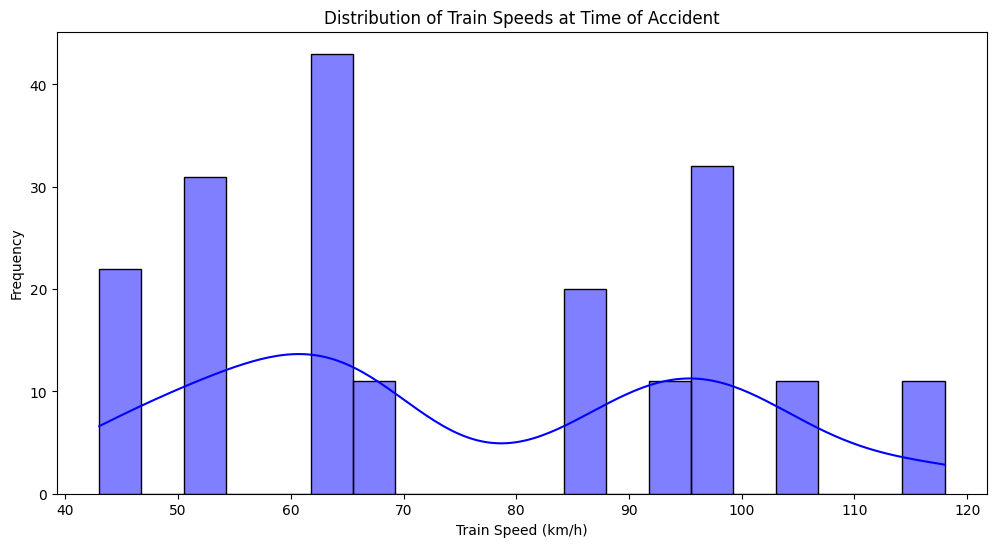

In [ ]:
# Speed vs. Accidents
plt.figure(figsize=(12, 6))
sns.histplot(df1["Train Speeed"], bins=20, kde=True, color="blue")
plt.title("Distribution of Train Speeds at Time of Accident")
plt.xlabel("Train Speed (km/h)")
plt.ylabel("Frequency")
plt.show()

<ipython-input-133-7058c997e934>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df1, x="Weather", palette="husl", order=df1["Weather"].value_counts().index)


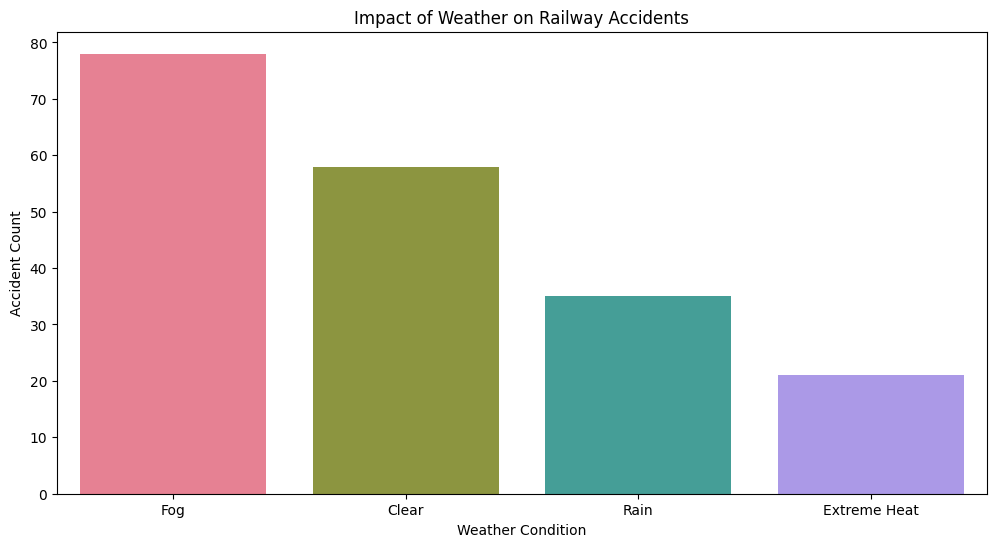

In [ ]:
# Impact of Weather on Accidents
plt.figure(figsize=(12, 6))
sns.countplot(data=df1, x="Weather", palette="husl", order=df1["Weather"].value_counts().index)
plt.title("Impact of Weather on Railway Accidents")
plt.xlabel("Weather Condition")
plt.ylabel("Accident Count")
plt.show()

<ipython-input-134-fb7c7d3faa40>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df1, x="Track condition", palette="muted", order=df1["Track condition"].value_counts().index)


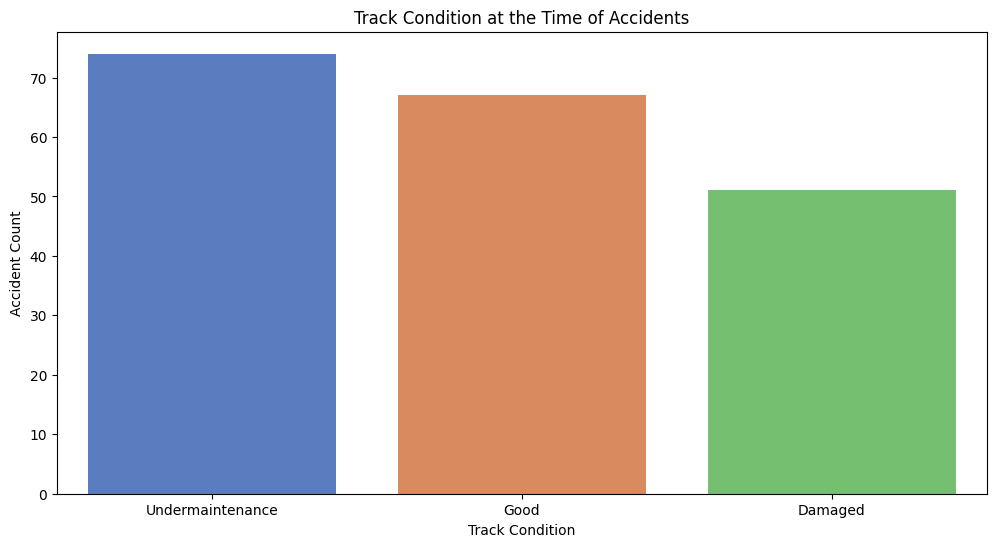

In [ ]:
# Track Condition vs. Accidents
plt.figure(figsize=(12, 6))
sns.countplot(data=df1, x="Track condition", palette="muted", order=df1["Track condition"].value_counts().index)
plt.title("Track Condition at the Time of Accidents")
plt.xlabel("Track Condition")
plt.ylabel("Accident Count")
plt.show()

<ipython-input-135-395b161bb75a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df1, x="Time of day", palette="pastel", order=df1["Time of day"].value_counts().index)


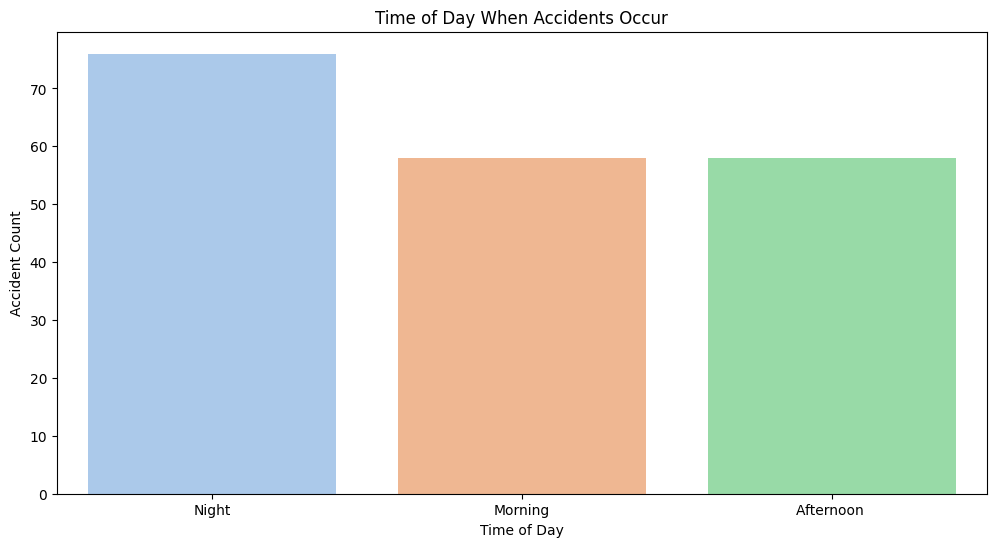

In [ ]:
# Time of Day vs. Accidents
plt.figure(figsize=(12, 6))
sns.countplot(data=df1, x="Time of day", palette="pastel", order=df1["Time of day"].value_counts().index)
plt.title("Time of Day When Accidents Occur")
plt.xlabel("Time of Day")
plt.ylabel("Accident Count")
plt.show()

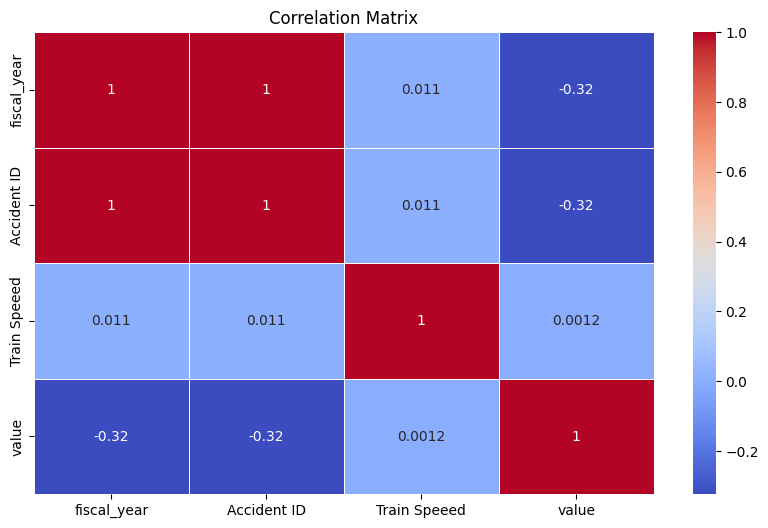

In [ ]:
# Select only numeric columns
numeric_df = df1.select_dtypes(include=['number'])

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

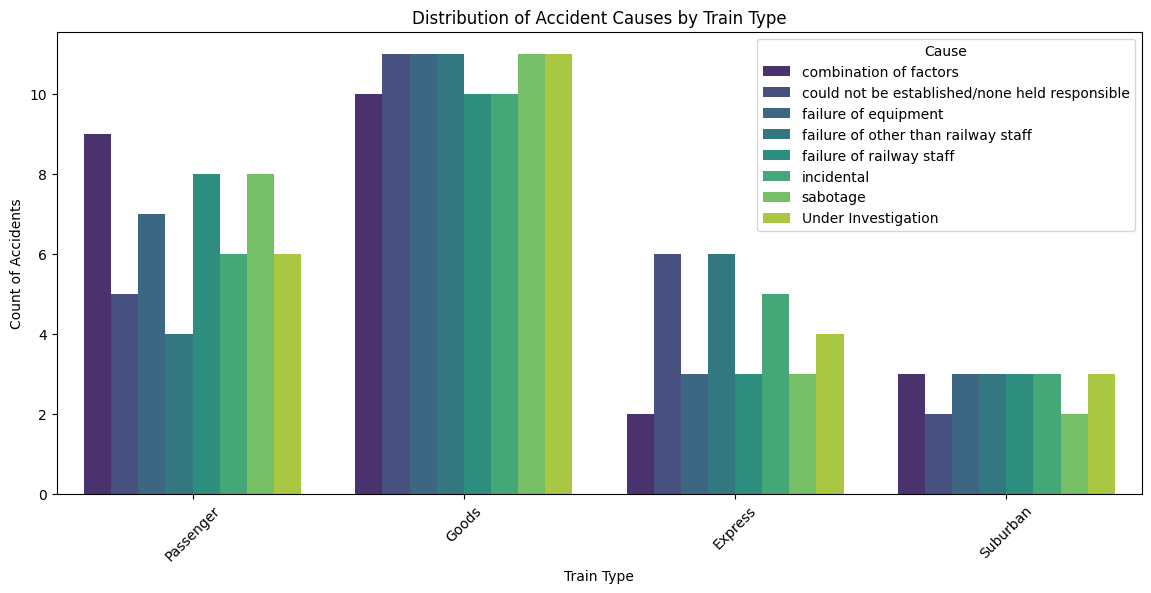

In [ ]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df1, x="Train Type", hue="cause", palette="viridis")
plt.xticks(rotation=45)
plt.title("Distribution of Accident Causes by Train Type")
plt.xlabel("Train Type")
plt.ylabel("Count of Accidents")
plt.legend(title="Cause", bbox_to_anchor=(1, 1))
plt.show()

<ipython-input-138-3a076a1a4935>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df1, x="Train Type", y="cause", palette="Set2")


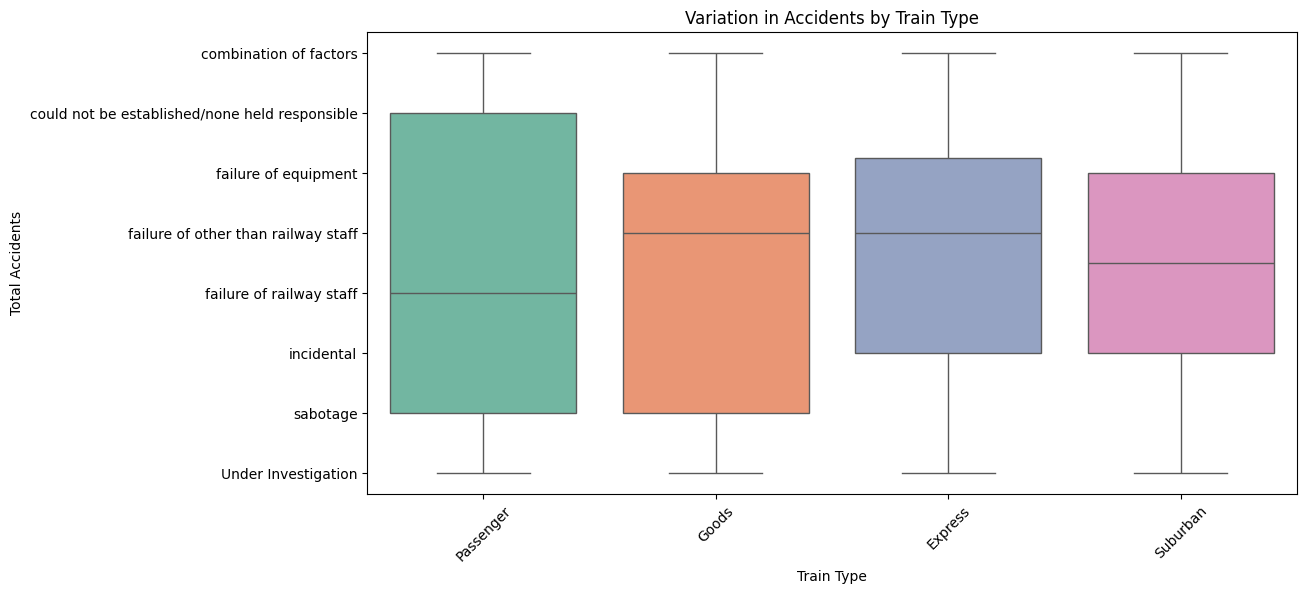

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df1, x="Train Type", y="cause", palette="Set2")
plt.xticks(rotation=45)
plt.title("Variation in Accidents by Train Type")
plt.xlabel("Train Type")
plt.ylabel("Total Accidents")
plt.show()

**Category Of Cause**

In [ ]:
# Load dataset
file_path = "Cleaned_railway_data -17-04-2025.xlsx"
df3 = pd.read_excel(file_path, sheet_name="Sheet1")

/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


In [ ]:
# Slice the first 1566 rows
df_subset = df3.iloc[:1566]

# Drop rows where 'Category of Cause' is missing or empty
df_subset = df_subset[df_subset["Category of cause"].notna()]
df_subset = df_subset[df_subset["Category of cause"].str.strip() != ""]

<Axes: title={'center': 'Distribution of Category of Cause (First 1566 Records)'}, ylabel='Category of cause'>

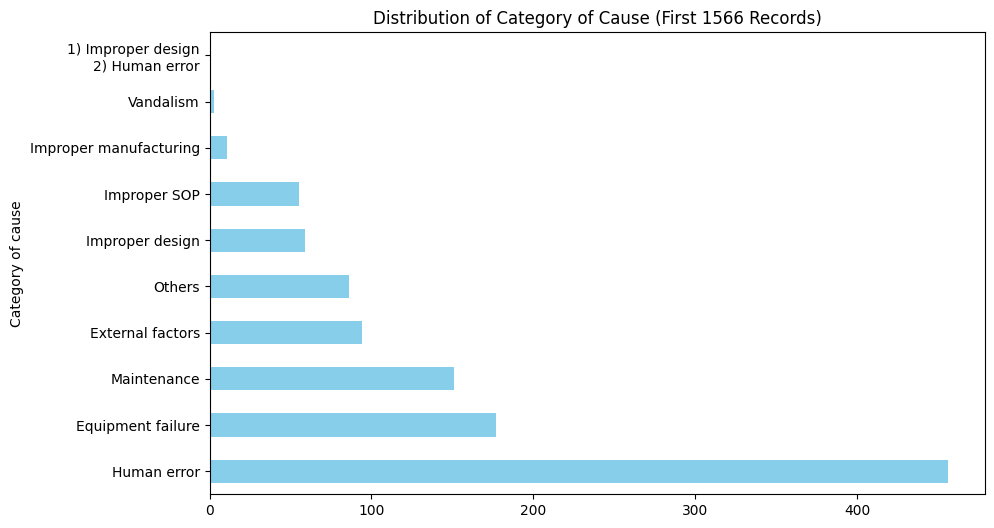

In [ ]:
#Top 10 Direct Causes
df3["Category of cause"].value_counts().head(10).plot(kind="barh", figsize=(10,6), color="skyblue", title="Distribution of Category of Cause (First 1566 Records)")

In [ ]:
cause_percent = (df3["Category of cause"].value_counts(normalize=True) * 100).round(2)
print(cause_percent)

Category of cause
Human error                           41.72
Equipment failure                     16.19
Maintenance                           13.82
External factors                       8.60
Others                                 7.87
Improper design                        5.40
Improper SOP                           5.03
Improper manufacturing                 1.01
Vandalism                              0.27
1) Improper design\n2) Human error     0.09
Name: proportion, dtype: float64


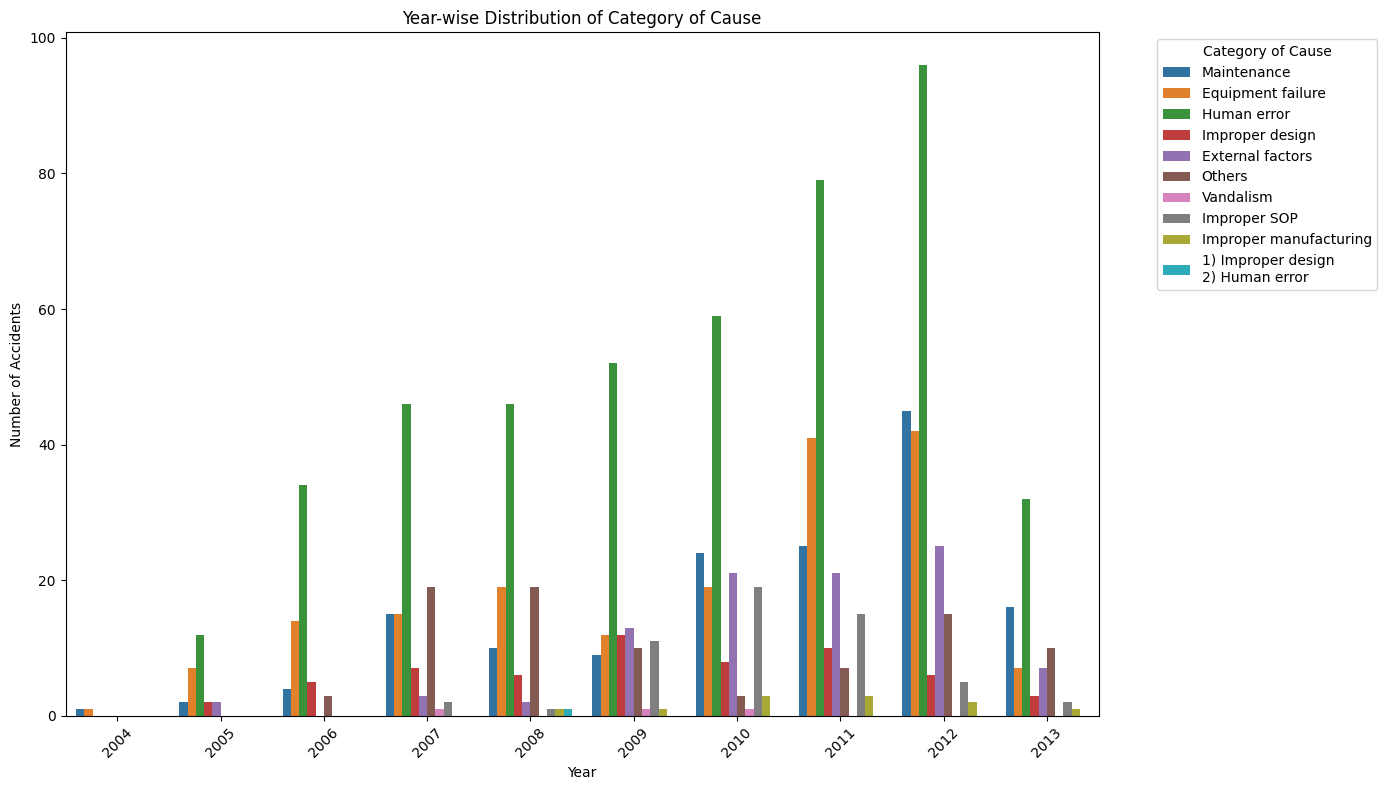

In [ ]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df_subset, x="Year", hue="Category of cause", palette="tab10")
plt.title("Year-wise Distribution of Category of Cause")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.legend(title="Category of Cause", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Conclusion

1. Problem Statement
- The script investigates common causes of railway accidents and potential safety measures.
- It analyzes patterns in accidents based on location and time.

- The goal is to recommend safety interventions based on data-driven insights.


2. Data Handling : **Railway accident investigations**
- Report Type (Final, Preliminary, etc.)

- Investigation Status (Open/Closed)

- Occurrence ID (Unique accident identifier)

- Title (Description of accident)

- Reporting Body (Authority investigating the accident)

- Date & Time of Occurrence

- Occurrence Type (Derailment, Collision, etc.)

3. Data Preprocessing
- Cleaning the dataset: Handling missing values, converting data formats, and feature selection.

- Feature Engineering: Extracting useful insights like time-based trends and accident severity.

4. Machine Learning Model
- The script likely trains an ML model to predict accident patterns or classify accidents based on severity.
-Model evaluation is performed using metrics such as accuracy, precision, recall, or confusion matrices.

5. Insights and Recommendations :  **Safety interventions**

- Improved railway infrastructure monitoring

- Enhanced signaling and automation

- Real-time tracking of railway conditions

- Predictive maintenance using ML

